In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("exams.csv")
data=df.copy()

data
df.values

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ],
       [95.86155507, 38.22527806,  0.        ],
       [75.01365839, 30.60326323,  0.        ],
       [82.30705337, 76.4819633 ,  1.        ],
       [69.36458876, 97.71869196,  1.        ],
       [39.53833914, 76.03681085,  0.        ],
       [53.97105215, 89.20735014,  1.        ],
       [69.07014406, 52.74046973,  1.        ],
       [67.94685548, 46.67857411,  0.        ],
       [70.66150955, 92.92713789,  1.        ],
       [76.97878373, 47.57596365,  1.        ],
       [67.37202755, 42.83843832,  0.   

In [3]:
# data["exam_1"] = (data["exam_1"]-data["exam_1"].min())/data["exam_1"].std()
# data["exam_2"] = (data["exam_2"]-data["exam_2"].mean())/data["exam_2"].std()
def do_min_max_normalize(data,col):
    data[col] = (data[col]-data[col].min())/(data[col].max()-data[col].min())

def do_z_score_normalize(data,col):
    data[col] = (data[col]-data[col].mean())/data[col].std()

do_min_max_normalize(data,"exam_1")
do_min_max_normalize(data,"exam_2")
data

,exam_1,exam_2,admitted
0,0.065428,0.694655,0
1,0.003266,0.194705,0
2,0.082968,0.619618,0
3,0.431764,0.816001,1
4,0.701943,0.655392,1
...,...,...,...
95,0.765817,0.260407,1
96,0.174904,0.827651,1
97,0.992649,0.559166,1
98,0.362356,0.502865,1


In [4]:
x0=np.ones(len(data))

In [5]:
X=np.array([x0,data["exam_1"],data["exam_2"]])
Y=data["admitted"]
W=np.array([0,1,2])
X=X.T

In [6]:
def sigmoid(X,W):
    z=np.dot(X,W)
    return 1/(1+np.e**-z)
Z=sigmoid(X,W)

Iteration 0
0.6255604816183553
Iteration 1000
0.24295154785110332
Iteration 2000
0.2202929058754835
Iteration 3000
0.21237549719397258
Iteration 4000
0.2086660522516031
Iteration 5000
0.20667739272398045
Iteration 6000
0.2055249923097141
Iteration 7000
0.2048226808247228
Iteration 8000
0.20437943351633758
Iteration 9000
0.20409248456967014
Iteration 10000
0.20390313847019706


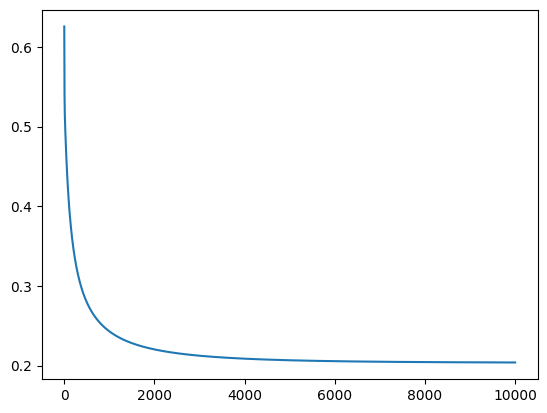

In [27]:
def gradientDescent(X,Y,W,alpha=0.5,iteration=10_000):
    costH=[]
    for i in range(iteration+1):
        
        H=sigmoid(X,W)
        g = np.dot(X.T,H-Y)/len(Y)
        W=W-alpha*g
        
        J = (-Y*np.log(H)-(1-Y)*np.log(1-H)).mean()
        costH.append(J)
      
        if i%1000==0:
            print(f"Iteration {i}")
            print(J)
    return costH,W

costH,Wn = gradientDescent(X,Y,W.copy())

plt.plot(costH)

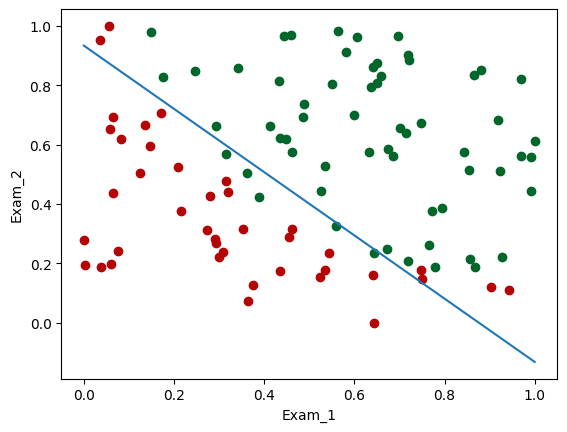

In [8]:
plt.ylabel("Exam_2")
plt.xlabel("Exam_1")

plt.scatter(data[data["admitted"]==1]["exam_1"],data[data["admitted"]==1]["exam_2"],color="#006629")

plt.scatter(data[data["admitted"]==0]["exam_1"],data[data["admitted"]==0]["exam_2"],color="#b50404")

xline=[data["exam_1"].min(),data["exam_1"].max()]

yline=-(Wn[0] + np.dot(Wn[1],xline))/Wn[2]
plt.plot(xline,yline)


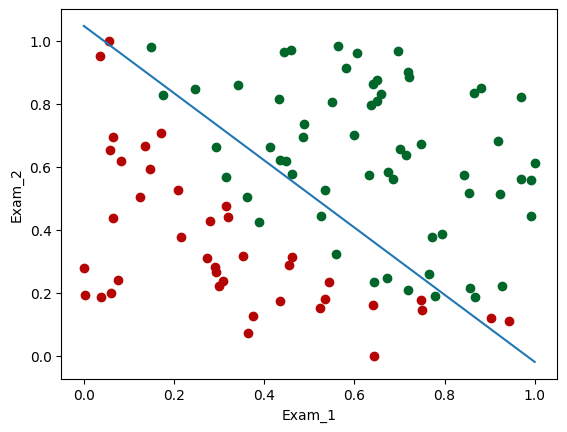

In [9]:
plt.ylabel("Exam_2")
plt.xlabel("Exam_1")

plt.scatter(data[data["admitted"]==1]["exam_1"],data[data["admitted"]==1]["exam_2"],color="#006629")
plt.scatter(data[data["admitted"]==0]["exam_1"],data[data["admitted"]==0]["exam_2"],color="#b50404")

xline=[data["exam_1"].min(),data["exam_1"].max()]
yline=(1-(Wn[0] + np.dot(Wn[1],xline)))/Wn[2]

plt.plot(xline,yline)

[0.0, 1.0]

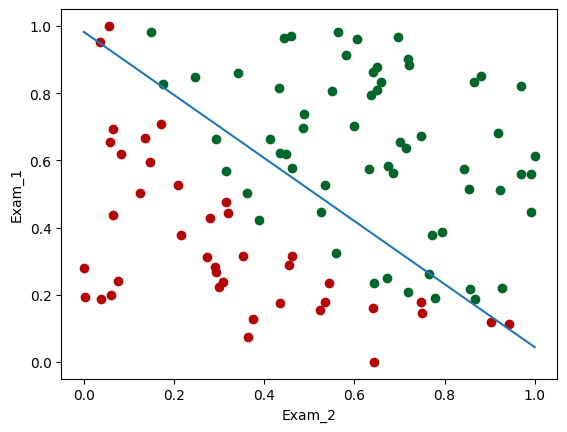

In [10]:
plt.ylabel("Exam_1")
plt.xlabel("Exam_2")

plt.scatter(data[data["admitted"]==1]["exam_1"],data[data["admitted"]==1]["exam_2"],color="#006629")
plt.scatter(data[data["admitted"]==0]["exam_1"],data[data["admitted"]==0]["exam_2"],color="#b50404")

xline=[data["exam_2"].min(),data["exam_2"].max()]
yline=(1-(Wn[0] + np.dot(Wn[2],xline)))/Wn[1]

plt.plot(xline,yline)
xline

array([ 0.87608465, -0.0621925 ])

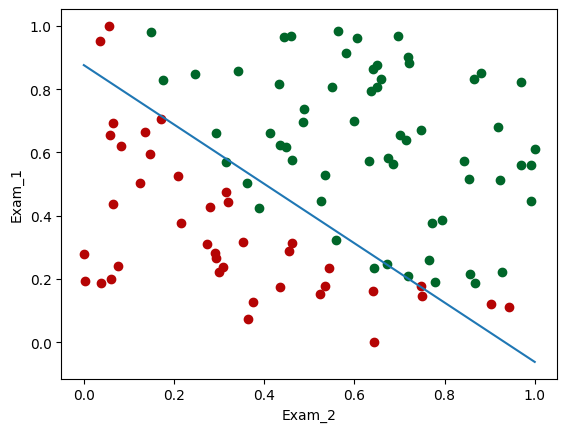

In [11]:
plt.ylabel("Exam_1")
plt.xlabel("Exam_2")

plt.scatter(data[data["admitted"]==1]["exam_1"],data[data["admitted"]==1]["exam_2"],color="#006629")
plt.scatter(data[data["admitted"]==0]["exam_1"],data[data["admitted"]==0]["exam_2"],color="#b50404")

xline=[data["exam_2"].min(),data["exam_2"].max()]
yline=(-(Wn[0] + np.dot(Wn[2],xline)))/Wn[1]

plt.plot(xline,yline)
yline

In [12]:
Z=sigmoid(X,Wn)
p=Z.copy()
p[p<0.5]=0
p[p>=0.5]=1
compareDf=pd.DataFrame(p)
p

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.])

In [13]:
compareDf.columns=["Predict"]

In [14]:
compareDf["Admitted"]=Y.copy()

In [15]:
accuracy = len(compareDf[compareDf["Predict"]==compareDf["Admitted"]])/len(compareDf)
accuracy

0.89

In [16]:
data.iloc[0:,0]

0     0.065428
1     0.003266
2     0.082968
3     0.431764
4     0.701943
        ...   
95    0.765817
96    0.174904
97    0.992649
98    0.362356
99    0.640930
Name: exam_1, Length: 100, dtype: float64

In [17]:
data

,exam_1,exam_2,admitted
0,0.065428,0.694655,0
1,0.003266,0.194705,0
2,0.082968,0.619618,0
3,0.431764,0.816001,1
4,0.701943,0.655392,1
...,...,...,...
95,0.765817,0.260407,1
96,0.174904,0.827651,1
97,0.992649,0.559166,1
98,0.362356,0.502865,1


In [18]:
data[data["admitted"]==1].iloc[0:,0]

3     0.431764
4     0.701943
6     0.445009
7     0.644497
8     0.659891
9     0.779343
12    0.748874
13    0.563370
15    0.342734
16    0.559150
18    0.581959
19    0.672504
21    0.854504
24    0.686053
25    0.461698
26    0.718533
30    0.448916
31    0.793270
33    0.315134
37    0.489016
40    0.771740
42    0.922824
46    0.675575
47    0.970528
48    0.458860
49    0.881568
50    0.715016
51    0.992040
52    0.866973
56    0.968722
58    0.633374
59    0.598226
60    0.649812
66    0.149045
68    0.719814
69    0.525848
71    0.487043
72    0.606109
73    0.435710
74    0.412534
75    1.000000
76    0.246606
77    0.292384
80    0.843570
81    0.928430
82    0.534054
83    0.389569
84    0.721064
85    0.550526
87    0.650989
88    0.696249
90    0.917821
91    0.865566
93    0.636871
94    0.856927
95    0.765817
96    0.174904
97    0.992649
98    0.362356
99    0.640930
Name: exam_1, dtype: float64

In [19]:
np.array([np.ones(len(data)),*np.array(data[["exam_1","exam_2"]]).T])==X

/tmp/ipykernel_6091/272445848.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.array([np.ones(len(data)),*np.array(data[["exam_1","exam_2"]]).T])==X


False

In [20]:
X

array([[1.        , 0.06542784, 0.69465488],
       [1.        , 0.00326632, 0.19470455],
       [1.        , 0.08296784, 0.61961779],
       [1.        , 0.43176427, 0.81600135],
       [1.        , 0.7019434 , 0.65539214],
       [1.        , 0.2153456 , 0.37665959],
       [1.        , 0.44500891, 0.96545859],
       [1.        , 0.64449684, 0.23365526],
       [1.        , 0.65989108, 0.83229079],
       [1.        , 0.77934283, 0.18940757],
       [1.        , 0.94315096, 0.11165142],
       [1.        , 0.64433793, 0.        ],
       [1.        , 0.74887421, 0.67205614],
       [1.        , 0.56336978, 0.98314328],
       [1.        , 0.13586997, 0.6655353 ],
       [1.        , 0.34273413, 0.85846452],
       [1.        , 0.55914951, 0.32427783],
       [1.        , 0.5430494 , 0.23547989],
       [1.        , 0.58195856, 0.91295399],
       [1.        , 0.67250409, 0.24862534],
       [1.        , 0.53481039, 0.17922749],
       [1.        , 0.85450448, 0.51557164],
       [1.